In [29]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# Carregando os dados das ações (Via, Magalu e B2W)

In [8]:
tag_list = ['VIIA3.SA', 'MGLU3.SA', 'AMER3.SA']
df_tag = pd.DataFrame()

In [10]:
for tag in tag_list:
    df_tag[tag] = wb.DataReader(tag, data_source='yahoo', start='2017-01-01')['Adj Close']

In [14]:
df_tag.head()

,VIIA3.SA,MGLU3.SA,AMER3.SA
Date,,,
2017-01-02,3.781286,0.379203,9.652307
2017-01-03,3.701680,0.378047,9.898346
2017-01-04,3.771335,0.357915,10.125460
2017-01-05,3.781286,0.370218,10.428276
2017-01-06,3.741483,0.367832,10.106532


In [16]:
df_tag.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1399 entries, 2017-01-02 to 2022-08-15
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   VIIA3.SA  1399 non-null   float64
 1   MGLU3.SA  1399 non-null   float64
 2   AMER3.SA  1399 non-null   float64
dtypes: float64(3)
memory usage: 43.7 KB


In [17]:
df_tag.describe()

,VIIA3.SA,MGLU3.SA,AMER3.SA
count,1399.000000,1399.000000,1399.000000
mean,8.213423,9.185492,42.074531
std,4.658778,7.786772,26.384650
min,1.830000,0.351092,9.652307
25%,4.580000,2.911710,22.998065
50%,7.114789,5.913709,33.428829
75%,11.405000,14.113764,59.790623
max,21.290001,27.401571,123.519012


# Criando o dataframe (df_tag_norm) com os preços ajustados *100

In [24]:
df_tag_norm = (df_tag / df_tag.iloc[0] * 100)

In [26]:
df_tag_norm

,VIIA3.SA,MGLU3.SA,AMER3.SA
Date,,,
2017-01-02,100.000000,100.000000,100.000000
2017-01-03,97.894742,99.695181,102.549022
2017-01-04,99.736845,94.386150,104.901969
2017-01-05,100.000000,97.630530,108.039213
2017-01-06,98.947374,97.001291,104.705876
...,...,...,...
2022-08-09,73.784425,812.229795,141.106168
2022-08-10,78.280252,867.609110,151.880794
2022-08-11,73.784425,801.681366,137.583692


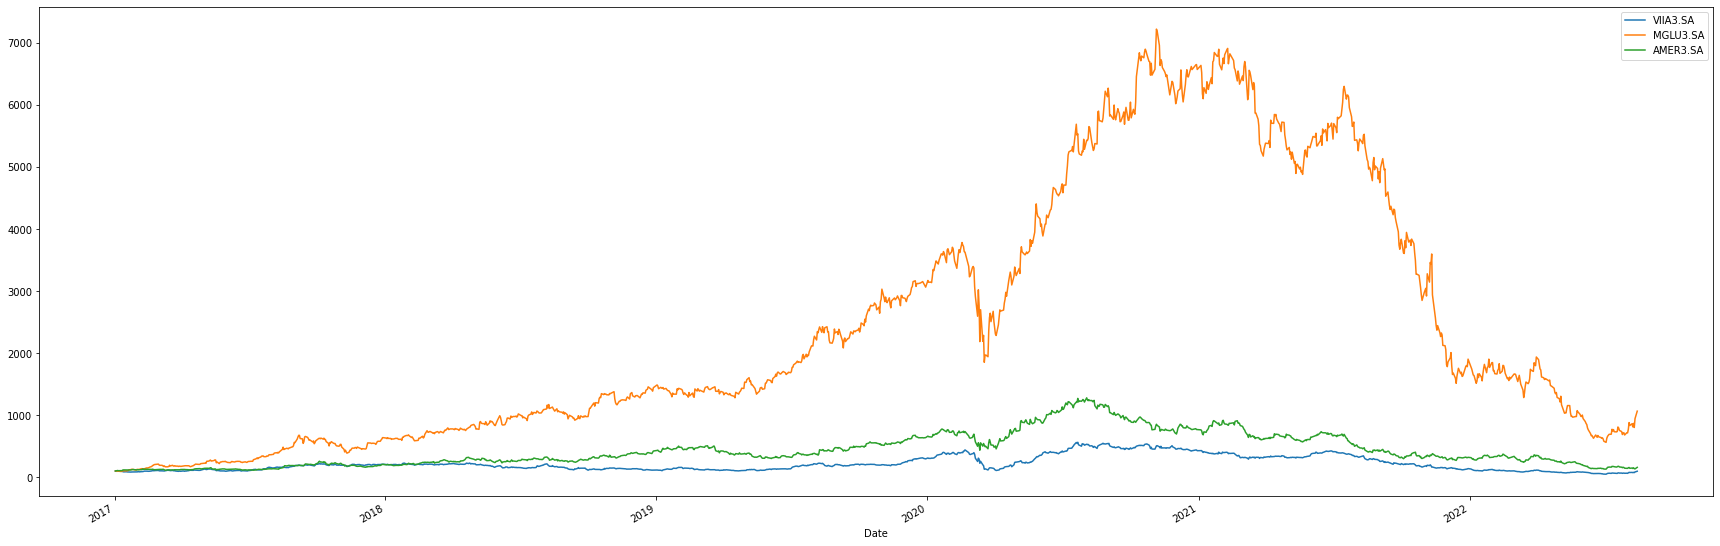

In [23]:
df_tag_norm.plot(figsize = (30, 10))
plt.show()

# Criando um dataframe (df_returns) com o calculo da taxa de retorno simples

In [27]:
df_return = (df_tag / df_tag.shift(1)) - 1
df_return

,VIIA3.SA,MGLU3.SA,AMER3.SA
Date,,,
2017-01-02,NaN,NaN,NaN
2017-01-03,-0.021053,-0.003048,0.025490
2017-01-04,0.018817,-0.053253,0.022945
2017-01-05,0.002638,0.034373,0.029906
2017-01-06,-0.010526,-0.006445,-0.030853
...,...,...,...
2022-08-09,-0.044521,-0.058104,-0.043539
2022-08-10,0.060932,0.068182,0.076358
2022-08-11,-0.057432,-0.075988,-0.094134


In [40]:
working_days = 250
weights = np.array([0.25, 0.25, 0.25])

In [41]:

df_annual_return = df_return.mean() * working_days
df_annual_return

VIIA3.SA    0.203721
MGLU3.SA    0.612245
AMER3.SA    0.267107
dtype: float64

In [42]:
np.dot(df_annual_return, weights)

0.27076839739764214

In [55]:
product_portifolio = np.dot(df_annual_return, weights)
print (' O produto do portifolio é de: {:.2%}'.format(product_portifolio))

 O produto do portifolio é de: 27.08%
